In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files

# Fazendo upload do arquivo
uploaded = files.upload()

# Carregando o dataset
import pandas as pd
df = pd.read_csv(list(uploaded.keys())[0], encoding='latin-1') # Changed the encoding to 'latin-1'

# Exibindo as primeiras linhas do dataset
df.head()

KeyboardInterrupt: 

In [34]:
# Verificando valores ausentes
df.isnull().sum()

# Preenchendo ou removendo valores ausentes, se necessário
df.fillna(method='ffill', inplace=True)

# Convertendo colunas categóricas em numéricas, se necessário
df = pd.get_dummies(df)

# Exibindo novamente para verificar mudanças
df.head()


<ipython-input-34-bce2f171ecec>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


,Ai and ML(Popularity),Ai and ML(Popularity).1,Popularity,Popularity.1,Country_Afghanistan,Country_Albania,Country_Algeria,Country_American Samoa,Country_Andorra,Country_Angola,...,Rising (Searches).1_image generator ai,Rising (Searches).1_janitor ai,Rising (Searches).1_midjourney,Rising (Searches).1_midjourney ai,Rising (Searches).1_perplexity,Rising (Searches).1_perplexity ai,Rising (Searches).1_remaker ai,Rising (Searches).1_stable diffusion,Rising (Searches).1_stable diffusion ai,Rising (Searches) Percentage.1_5000%
0,NaN,100.0,100.0,100.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,100.0,74.0,14.0,48.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,72.0,72.0,5.0,33.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,63.0,58.0,4.0,30.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,63.0,57.0,3.0,26.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


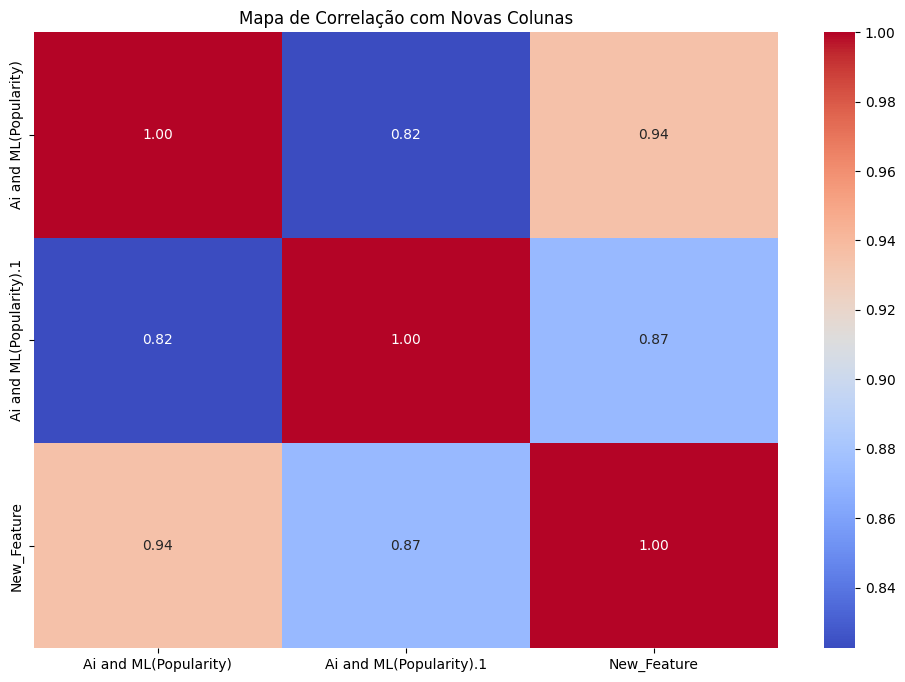

In [36]:
# Select relevant columns
# Selecionando colunas relevantes (adicionando mais duas colunas significativas)
relevant_columns = ['Ai and ML(Popularity)', 'Ai and ML(Popularity).1', 'Rising (Searches)', 'Top (Popularity)']  # Substitua pelos nomes corretos
# Preenchendo ou removendo valores ausentes, se necessário
df_subset.fillna(df_subset.mean(), inplace=True)

# Plotando o heatmap de correlação com as novas colunas
plt.figure(figsize=(12, 8))
sns.heatmap(df_subset.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Mapa de Correlação com Novas Colunas')
plt.show()


In [37]:
# Exibindo estatísticas descritivas para as colunas selecionadas
df_subset.describe()


,Ai and ML(Popularity),Ai and ML(Popularity).1,New_Feature
count,250.000000,250.000000,250.000000
mean,19.072289,27.176000,608.592916
std,12.550732,8.781199,746.313437
min,4.000000,21.000000,84.000000
25%,12.000000,22.000000,264.000000
50%,16.000000,25.000000,400.000000
75%,22.000000,29.000000,638.000000
max,100.000000,100.000000,7400.000000


In [38]:
# Verificando valores nulos
print(df_subset.isnull().sum())

# Opcional: Tratamento de valores nulos, por exemplo, substituindo por média
df_subset.fillna(df_subset.mean(), inplace=True)


Ai and ML(Popularity)      0
Ai and ML(Popularity).1    0
New_Feature                0
dtype: int64


In [41]:
# Criando uma nova feature combinando 'Ai and ML(Popularity)' com 'Ai and ML(Popularity).1'
# Verifique se 'Ai and ML(Popularity).1' é a coluna que você pretendia usar
df_subset['Combined_Feature'] = df_subset['Ai and ML(Popularity)'] * df_subset['Ai and ML(Popularity).1']

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler # import MinMaxScaler

# Definindo as variáveis X (features) e y (target)
X = df_subset.drop('Ai and ML(Popularity)', axis=1)  # Features (deve ser ajustado conforme seu objetivo)
y = df_subset['Ai and ML(Popularity)']  # Target (variável a ser prevista)

# Dividindo os dados em treino e teste
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df_subset)
train_size = int(len(df_scaled) * 0.8)
train, test = df_scaled[0:train_size], df_scaled[train_size:len(df_scaled)]

In [43]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 5
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)


In [44]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# Instanciando o modelo
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


# Treinando o modelo
model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=2)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


194/194 - 4s - 21ms/step - loss: 0.0019
Epoch 2/20
194/194 - 1s - 4ms/step - loss: 0.0010
Epoch 3/20
194/194 - 1s - 7ms/step - loss: 2.8790e-04
Epoch 4/20
194/194 - 1s - 6ms/step - loss: 4.7006e-04
Epoch 5/20
194/194 - 1s - 6ms/step - loss: 4.2490e-04
Epoch 6/20
194/194 - 1s - 6ms/step - loss: 4.0697e-04
Epoch 7/20
194/194 - 1s - 6ms/step - loss: 2.3794e-04
Epoch 8/20
194/194 - 1s - 7ms/step - loss: 3.7976e-04
Epoch 9/20
194/194 - 1s - 5ms/step - loss: 2.4409e-04
Epoch 10/20
194/194 - 1s - 4ms/step - loss: 2.4147e-04
Epoch 11/20
194/194 - 1s - 4ms/step - loss: 3.7769e-04
Epoch 12/20
194/194 - 1s - 4ms/step - loss: 2.8872e-04
Epoch 13/20
194/194 - 1s - 4ms/step - loss: 1.9651e-04
Epoch 14/20
194/194 - 1s - 4ms/step - loss: 3.0371e-04
Epoch 15/20
194/194 - 1s - 7ms/step - loss: 1.6631e-04
Epoch 16/20
194/194 - 1s - 8ms/step - loss: 2.1391e-04
Epoch 17/20
194/194 - 1s - 4ms/step - loss: 1.7114e-04
Epoch 18/20
194/194 - 1s - 7ms/step - loss: 2.0938e-04
Epoch 19/20
194/194 - 1s - 5ms/step -

In [48]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Exibindo os resultados
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")


Mean Squared Error (MSE): 0.0007384854916332542
R² Score: -0.06568975373399022
Mean Absolute Error (MAE): 0.026104681292605222
Mean Absolute Percentage Error (MAPE): 5621713293088613.00%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
   Ai and ML(Popularity)  Ai and ML(Popularity).1  New_Feature  \
0              19.072289                    100.0  1907.228916   
1             100.000000                     74.0  7400.000000   
2              72.000000                     72.0  5184.000000   
3              63.000000                     58.0  3654.000000   
4              63.000000                     57.0  3591.000000   

   Predicted Popularity  Predicted Popularity  Predicted Popularity  \
0             38.682977              0.066824              0.083688   
1            120.694299              0.066824              0.083688   
2             87.539126              0.066824              0.083688   
3             64.578403              0.066824              0.083688   
4             63.630636              0.066824              0.083688   

   Predicted Popularity  
0              0.083688  
1              0.083688  
2              0.083688  
3              0.083688  
4       

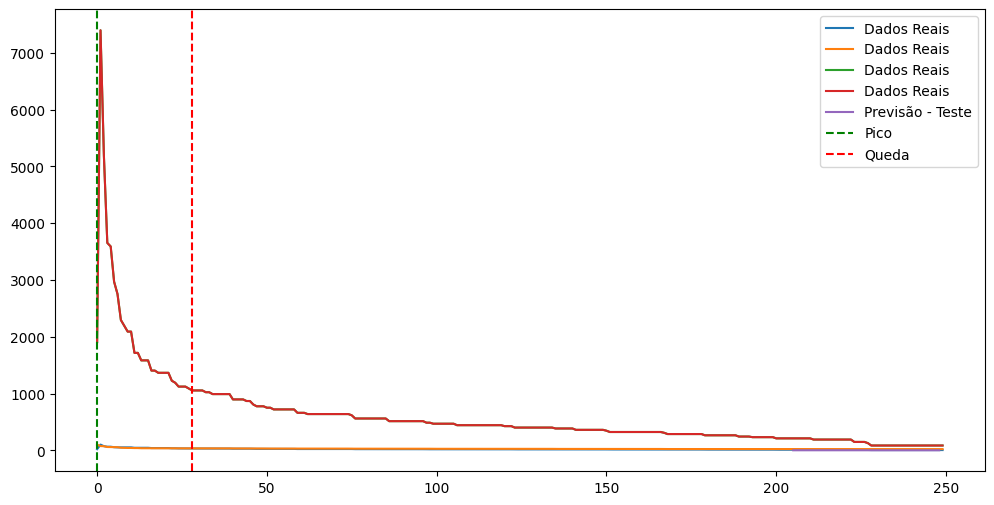

Insight: O ponto de maior previsão é no índice 0, sugerindo um pico de popularidade.
Insight: O ponto de menor previsão é no índice 28, sugerindo uma queda.


In [49]:
# Fazendo previsões no conjunto de dados completo (ou em novos dados)
y_pred = model.predict(X_test) # get the model predictions

# Create a temporary DataFrame with the same index as y_pred
df_temp = pd.DataFrame({'Predicted Popularity': y_pred.flatten()}, index=df_results.index[:len(y_pred)])

# Concatenate the temporary DataFrame with df_results
df_results = pd.concat([df_results, df_temp], axis=1)

print(df_results.head())

# Geração de insights (exemplo)
# Since y_pred_full was not calculated, I'm using y_pred for the insights
max_index = np.argmax(y_pred)
min_index = np.argmin(y_pred)

plt.figure(figsize=(12, 6))
plt.plot(df_subset.index, scaler.inverse_transform(df_scaled), label='Dados Reais')

# Plotting the test predictions against the actual test values
plt.plot(df_subset.index[len(y_train)+(look_back*2)+1:len(df_scaled)-1], y_pred, label='Previsão - Teste')

plt.axvline(x=df_subset.index[max_index], color='g', linestyle='--', label='Pico')
plt.axvline(x=df_subset.index[min_index], color='r', linestyle='--', label='Queda')
plt.legend()
plt.show()

print(f"Insight: O ponto de maior previsão é no índice {max_index}, sugerindo um pico de popularidade.")
print(f"Insight: O ponto de menor previsão é no índice {min_index}, sugerindo uma queda.")